In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os, re
import json
import pprint

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [16, 8]

pd.set_option('display.max_colwidth', -1)

# Part 1 - Tokopedia Dataset

![toped](https://www.galamedianews.com/media/original/200503051913-15-ju.jpg)

* Text cleaning using RegEx
* Word Embedding bahasa indonesia
* Spelling corrector
* EDA
* Recommendation System - Content-Based

In [2]:
toped_df = pd.read_csv('/kaggle/input/tokopedia-product-reviews/product_reviews_dirty.csv')

print('Dataset shape: {} rows {} columns'.format(toped_df.shape[0], toped_df.shape[1]))

Dataset shape: 40607 rows 9 columns


In [3]:
toped_df.drop(['Unnamed: 0', 'sold', 'product_id', 'shop_id'], axis=1, inplace=True)

In [4]:
toped_df.sample(5)

,text,rating,category,product_name,product_url
18995,baguuuussssssssssssssssssssssssssssssss,4,elektronik,USB HUB 3.0 7 port by DIGIGEAR HIGH SPEED 1.2 meter,https://www.tokopedia.com/multikomputer201/usb-hub-30-7-port-by-digigear-high-speed-12-meter
37080,"""bu, itu papan seluncur buat Aydan ya, terima kasih ya bu !!!! "" oke, semangat ya nak berenangnya :)",4,olahraga,Papan Renang,https://www.tokopedia.com/warungolahraga/papan-renang
20254,Ok lumayan kualitas sesuai harga,4,elektronik,Mouse wireless / Bluetooth Airmouse Alcatroz by Powerlogic Resmi murah,https://www.tokopedia.com/multikomputer201/mouse-wireless-bluetooth-airmouse-alcatroz-by-powerlogic-resmi-murah
5452,"Harga bersahabat, kualitas ok",5,handphone,NOKIA 130 dual sim handphone hp,https://www.tokopedia.com/anshopp123/nokia-130-dual-sim-handphone-hp
23219,Barang sesuai permintaan... Responds penjual cepat.. Mantab..,5,elektronik,Kabel Printer LPT to USB / USB to Pararel Converter,https://www.tokopedia.com/multikomputer201/kabel-printer-lpt-to-usb-usb-to-pararel-converter


## Text Cleaning using RegEx

![regex](https://miro.medium.com/max/1280/1*oaFozQztiv9WMMcwX9m9HQ.jpeg)


* Regular Expression is a special text string used for search, split or replace a specific pattern, even emoji.
* For practice you can use [this website](https://regex101.com/)

In [5]:
# delete repeated words
test1 = "UUUURRGGGEENNTTT"
print(re.sub(r'(\w)\1+', r'\1', test1))

URGENT


In [6]:
# replace words
test2 = 'bos sy cb bs smua, cm syg pack nya da yg penyok sdkt, gk pa lah, sy suka koq'

def substitute(text):
#     text = re.sub(r'sy', 'saya', text, count=1) # use this IF ONLY 1 pattern exist
    text = re.sub(r'\s(sy)\s', ' saya ', text) # second option, more saver
    text = re.sub(r'\s(cb)\s', ' coba ', text)
    text = re.sub(r'\s(bs)\s', ' bisa ', text)
    text = re.sub(r'\s(cm)\s', ' cuma ', text)
    return text

substitute(test2)

'bos saya coba bisa smua, cuma syg pack nya da yg penyok sdkt, gk pa lah, saya suka koq'

### Before cleaning

In [7]:
toped_df['text'].loc[[7554, 20905, 16091, 1675, 29380, 22632, 9266, 23641]]

7554     lengketttttttttttt...\n\n....\njkklllofdaafuojffdvhuu                                                            
20905    siip.........................                                                                                    
16091    👍👍👍👍👍                                                                                                            
1675     langsung dicoba. langsung mak nyosssss\n\ngoooooooooooooooooooooooood                                            
29380    Siiiip, barang sudah sampai. Sukses selalu                                                                       
22632    ty gannnnnnnnnnnnnnnnnnnnnnnnn                                                                                   
9266     brg murah kwalitas oke mantap bos, sy cb bs smua, cm syg pack nya da yg penyok sdkt, gk pa lah, recomended seller
23641    Mantap boskuh,luar biasa                                                                                         
Name: text, dtyp

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', '', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'👍|👍🏻', 'bagus ', text)
    text = re.sub(r'😍', 'suka ', text)
    text = re.sub('[^a-z0-9 ]', ' ', text)
    text = re.sub(r'thx|ty', 'terima kasih', text)
    text = re.sub(r'(\w)\1+', r'\1', text)  # this makes good become god, be careful for english
    text = re.sub(r'god', ' bagus ', text)
    text = re.sub(r'gan|boskuh', ' ', text) # gan == juragan, delete saja
    text = re.sub(r'mksh', 'terima kasih', text)
    text = re.sub(r'gan', ' ', text)
    text = re.sub(r'skrg', 'sekarang', text)
    text = re.sub(r'bnr2', 'benar benar', text)
#     text = re.sub(r'sy', 'saya', text, count=1) # make non global IF ONLY 1 pattern exist!!
    text = re.sub(r'\s(sy)\s', ' saya ', text) # This is more saver option
    text = re.sub(r'\s(cb)\s', ' coba ', text)
    text = re.sub(r'\s(maf)\s', ' maaf ', text)
    text = re.sub(r'\s(tq)\s', ' terima kasih ', text)
    text = re.sub(r'\s(brg)\s', ' barang ', text)
    text = re.sub(r'\s(tlg)\s', ' tolong ', text)
    text = re.sub(r'\s(gk)\s', ' gak ', text)
    text = re.sub(r'\s(yg)\s', ' yang ', text)
    text = re.sub(r'\s(brg)\s', ' barang ', text)
    text = re.sub(r'\s(bs)\s', ' bisa ', text)
    text = re.sub(r'\s(cm)\s', ' cuma ', text)
    text = re.sub(r'\s(smua)\s', ' semua ', text)
    text = re.sub(r'\s(sdkt)\s', ' sedikit ', text)
    
    tokenizer = text.split()
    return ' '.join([text for text in tokenizer])
    
toped_df['text'] = toped_df['text'].apply(clean_text)

### After cleaning

In [9]:
toped_df['text'].loc[[7554, 20905, 16091, 1675, 29380, 22632, 9266, 23641]]

7554     lengket jklofdafuojfdvhu                                                                                                   
20905    sip                                                                                                                        
16091    bagus bagus bagus bagus bagus                                                                                              
1675     langsung dicoba langsung mak nyos bagus                                                                                    
29380    sip barang sudah sampai sukses selalu                                                                                      
22632    terima kasih                                                                                                               
9266     brg murah kwalitas oke mantap bos saya coba bisa semua cuma syg pack nya da yang penyok sedikit gak pa lah recomended seler
23641    mantap luar biasa                                           

In [10]:
# be careful, sometimes greedy can delete all words, use non-greedy approach instead..
test3 = toped_df.product_name.loc[8657]

print("Original:", test3)
print()
print("Greedy:", re.sub(r'&#40;.+&#41;', '', test3))
print()
print("Non-Greedy", re.sub(r'&#40;.+?&#41;', '', test3))

Original: &#40;DC014&#41; Kipas angin micro usb / Kipas Micro Usb &#40;langsung di HP&#41;

Greedy: 

Non-Greedy  Kipas angin micro usb / Kipas Micro Usb 


In [11]:
def clean_title(text):
    text = text.lower()
    text = re.sub(r'&#40;.+?&#41;', '', text) # non-greedy
    text = re.sub(r'&#34;', '', text)
    text = re.sub(r'&amp;', 'dan', text)
    
    tokenizer = text.split()
    words = [word for word in tokenizer if len(word) > 2]
    
    return ' '.join(words)

toped_df['product_name'] = toped_df['product_name'].apply(clean_title)

## Word Embedding use FastText Bahasa Indonesia

![word2vec](https://miro.medium.com/max/1400/1*YAGrtIpuRyA87iQHIwuPVA.jpeg)
source: [medium](https://medium.com/data-science-group-iitr/word-embedding-2d05d270b285)

Word embedding is a learned representation for text where words that have the same meaning have a similar representation. Each word is represented by a vector, often hundreds of dimensions. Word vectors will be closed if they have similar meaning. For example, buy and purchase will be closer.

Some popular word embedding models in use today: Word2Vec, GloVe, fastText, ELMo etc

One major draw-back for word-embedding techniques like word2vec and glove was its inability to deal with out of corpus words. In case there is a word that does not appear in the corpus word2vec or glove fails to get their vectorized representation.

* Fasttext can generate embedding for the words that does not appear in the training corpus.
* This can be done by adding the character n-gram of all the n-gram representations.

In [12]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz

--2020-06-17 03:17:20--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227018698 (1.1G) [binary/octet-stream]
Saving to: ‘cc.id.300.vec.gz’

cc.id.300.vec.gz    100%[===================>]   1.14G  18.7MB/s    in 59s     

2020-06-17 03:18:20 (19.7 MB/s) - ‘cc.id.300.vec.gz’ saved [1227018698/1227018698]



In [13]:
import gzip

word2vec = {}
with gzip.open('/kaggle/working/cc.id.300.vec.gz', 'rb') as file:
    for line in file:
        values = line.split()
        if len(values) == 301:
            try:
                word = values[0].decode('ascii') # encode utk mengembalikan seperti semula
                vector = np.asarray(values[1:], dtype='float32')
                word2vec[word] = vector
#               nlp.vocab.set_vector(word, vector)  # add the vectors to the vocab for spacy
            except:
                continue
        
print('Found {} word vectors'.format(len(word2vec)))

Found 1901219 word vectors


In [14]:
from scipy.spatial.distance import cosine

# check cosine distance between words
def word_sim(word1, word2):
    print(1 - cosine(word2vec[word1], word2vec[word2]))
    
word_sim('makan', 'batu')
word_sim('raja', 'ratu')

0.2888874411582947
0.6639522314071655


In [15]:
# similar to gensim.wv.most_similar
sim = {}

for key in word2vec.keys():
    sim[key] = 1 - cosine(word2vec['pria'], word2vec[key])
    
pd.Series(sim).sort_values(ascending=False)[:20]

pria              1.000000
wanita            0.874104
pria.Pria         0.792102
pria.Wanita       0.747615
wanita.Pria       0.744234
Pria              0.739605
lelaki            0.729725
wanita.Wanita     0.724642
laki-laki         0.712554
pria-             0.708269
priaseorang       0.699902
wanita.Seorang    0.693401
prialah           0.687851
perempuan         0.681629
pria-pria         0.676591
pria2             0.674352
wania             0.672319
priapun           0.670910
wanitapun         0.666998
wanita-           0.663874
dtype: float64

## Indonesian Spelling corrector

In [16]:
WORDS = {}

for idx, word in enumerate(word2vec.keys()):
    WORDS[word] = idx

In [17]:
import itertools

# print 10 word-rank teratas
dict(itertools.islice(WORDS.items(), 10))

{',': 0,
 '.': 1,
 '</s>': 2,
 'yang': 3,
 'dan': 4,
 '"': 5,
 'di': 6,
 ')': 7,
 '(': 8,
 'dengan': 9}

In [18]:
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word): 
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [19]:
print(correction('J4karta'))
print(correction('bndung'))
print(correction('mnydihkan'))
print(correction('beanja'))
print(correction('kcingg'))

Jakarta
bandung
menyedihkan
belanja
kucing


### Problem:

* This model is far away from perfect, many mistakes were made below..
* Make Indonesian spell correction is not easy, but I believe we can make good models as long as we work together as a team..

In [20]:
print(correction('mknan'))
print(correction('cuapek'))
print(correction('lpar'))

mknan
cuapek
luar


However, word embedding models have a limitations. Available word embeddings are trained on very shallow language modelling tasks — therefore, word embeddings are unable to capture combinations of words and context. Therefore, the word ‘bank’ might be understood as in ‘rob the bank’ but fail to be recognized in ‘the water overflowed the riverbank’.

If you deal with domain specific text (like e-commerce) and most of your word cannot be found from your word embedding model, you may consider to build customize word embedding layer.

Traditional context-free models (like word2vec or GloVe) generate a single word embedding representation for each word in the vocabulary which means the word “right” would have the same context-free representation in “I’m sure I’m right” and “Take a right turn.” However, Google BERT (i'll explain this later) would represent based on both previous and next context making it bidirectional. While the concept of bidirectional was around for a long time, BERT was first on its kind to successfully pre-train bidirectional in a deep neural network.

## EDA

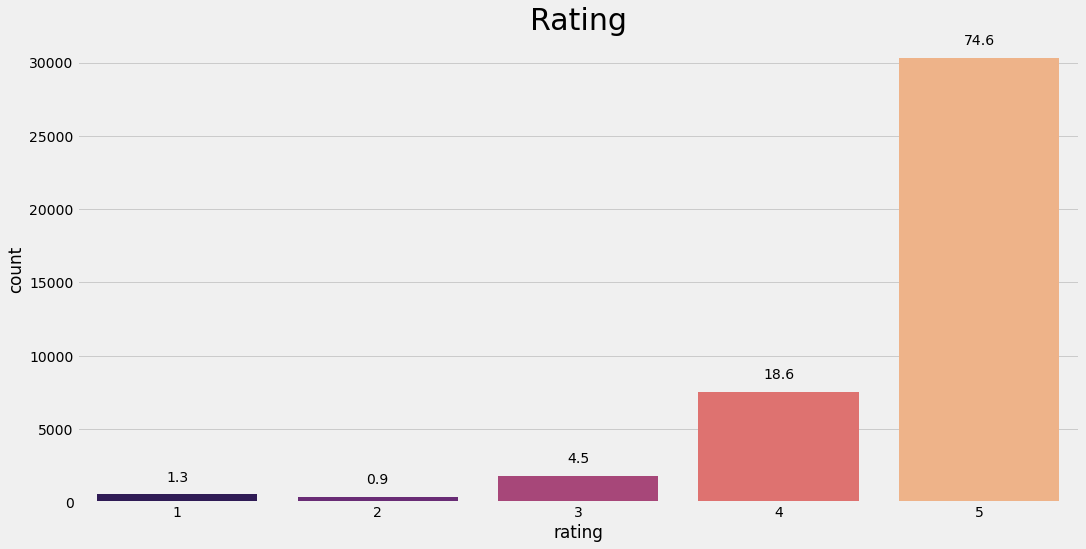

In [21]:
splot1 = sns.countplot(toped_df['rating'], palette='magma')

for p in splot1.patches:
    splot1.annotate(format(p.get_height() / toped_df.shape[0] * 100, '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                    rotation=0, ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')
    
plt.title('Rating', fontsize=30);

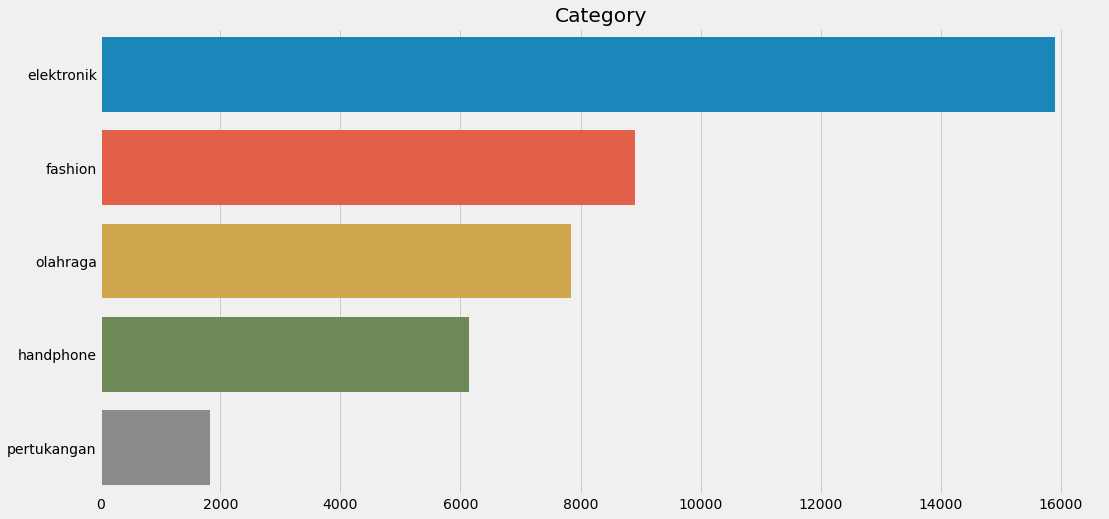

In [22]:
cat_count = toped_df['category'].value_counts()

sns.barplot(x=cat_count.values,
            y=cat_count.index).set_title('Category');

In [23]:
cat_df = toped_df.groupby('category').size().rename('total_count').reset_index()
cat_df['percentage'] = round(cat_df['total_count'] / toped_df.shape[0] * 100, 2)
cat_df['percentage'] = cat_df['percentage'].astype(str)

cat_df.style.background_gradient(cmap='Blues')

,category,total_count,percentage
0,elektronik,15897,39.15
1,fashion,8910,21.94
2,handphone,6136,15.11
3,olahraga,7838,19.3
4,pertukangan,1826,4.5


## My opinion to make a classification model:

![deep learning](https://hackernoon.com/hn-images/0*GTzatEUd4cICPVub.)
source: [hackernoon](https://www.google.com/url?sa=i&url=https%3A%2F%2Fhackernoon.com%2F%25EF%25B8%258F-big-challenge-in-deep-learning-training-data-31a88b97b282&psig=AOvVaw3A9xea6greu8ZQoKraroWT&ust=1592375413841000&source=images&cd=vfe&ved=0CAMQjB1qFwoTCODmouvaheoCFQAAAAAdAAAAABAK)

* It's difficult to make a good sentiment analysis model using text review, because of class imbalance problem
* Although we can use product_name to make a category classification, i prefer **shopee competition dataset** because it has bigger dataset (666615 rows), compare with tokopedia dataset (only 40607 rows)
* Remember Deep Learning is data hungry, so we must feed the model with a lot of data for training..

## Recommendation System - Content-Based

![content-based](https://www.yuspify.com/wp-content/uploads/2018/08/abc-test.jpg)
source: [yuspify](https://www.yuspify.com/blog/examples-of-personalized-recommendations-in-ecommerce/)

* The Content-Based Recommender relies on the similarity of the items being recommended.
* The basic idea is that if you like an item, then you will also like a “similar” item.
* It generally works well when it's easy to determine the context/properties of each item.

In [24]:
# first, we must remove duplicates rows
product_list = toped_df[['product_name', 'product_url', 'rating']].drop_duplicates(subset='product_name').reset_index(drop=True)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=3)
tfidf_matrix = tfidf.fit_transform(product_list['product_name'])

tfidf_matrix.shape

(3604, 3358)

In [26]:
# Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [27]:
indices = pd.Series(product_list.index, index=product_list['product_name'])

def product_recommendation(product_name, rating=False):
    
    if rating == False:
        idx = indices[product_name]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:6] # top-5
        product_indices = [i[0] for i in sim_scores]
    
        return pd.DataFrame({'Product': product_list['product_name'].iloc[product_indices].values,
                             'url': product_list['product_url'].iloc[product_indices].values})
    
    if rating == True:
        idx = indices[product_name]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[0:11] # top-10
        product_indices = [i[0] for i in sim_scores]
    
        result = pd.DataFrame({'Product': product_list['product_name'].iloc[product_indices].values,
                             'url': product_list['product_url'].iloc[product_indices].values,
                             'rating': product_list['rating'].iloc[product_indices].values})
        
        return result.sort_values('rating', ascending=False).head(5)

### This function have two options:

1. Prioritizing similarity on product name based on product-name (by default)
1. From top-10 most similar product, we sort again by rating to give a high rating product recommendation, also avoid bad rating **(rating=True)**

In [28]:
toped_df['product_name'].sample(5)

7123     #de040 speaker aktif fleco f-018 digital musik audio komputer       
11093    alivelovearts claire navy heels fashion sepatu wanita termurah biru,
18851    usb hub 3.0 port digigear high speed 1.2 meter                      
11541    sepatu bata carri black 5616401                                     
682      staples tembak homaster steples tembak staple gun bonus isi 600pcs  
Name: product_name, dtype: object

### NOTE:

* You can open the url to make sure the products is similar in Tokopedia website
* I deliberately include the product that we want to find in the first row, so we can check whether this recommendation is correct or not?

In [29]:
product_recommendation('charger output lampu samsung dan xiaomi fast charging 3.5a')

,Product,url
0,charger output lampu samsung dan xiaomi fast charging 3.5a,https://www.tokopedia.com/handphonetiam/charger-2-output-lampu-samsung-xiaomi-fast-charging-3-5a
1,fast charging wireless charger stand samsung galaxy dan s7edge,https://www.tokopedia.com/handphonetiam/fc049-fast-charging-wireless-charger-stand-samsung-galaxy-s7-s7edge
2,dekstop awt slot kabel fast charging charger vapor,https://www.tokopedia.com/handphonetiam/gd034-dekstop-awt-c4-4-slot-kabel-fast-charging-charger-vapor
3,#fd163 kabel data xiaomi fast charging xiaomi redmi original 100%,https://www.tokopedia.com/handphonetiam/fd163-kabel-data-xiaomi-fast-charging-2a-xiaomi-redmi-original-100
4,la78041 crt vertical deflection output bp86,https://www.tokopedia.com/hpasesoris/la78041-tv-crt-vertical-deflection-output-ic-bp86
5,powerbank mofit veger m19 10000 mah 3.0 fast charging,https://www.tokopedia.com/handphonetiam/ae012-powerbank-mofit-by-veger-m19-10000-mah-3-0-fast-charging


In [30]:
product_recommendation('jump rope skipping busa kettler', rating=True)

,Product,url,rating
0,jump rope skipping busa kettler,https://www.tokopedia.com/warungolahraga/jump-rope-skipping-busa-kettler,5
1,jump rope lompat tali skipping speed rope kettler,https://www.tokopedia.com/warungolahraga/jump-rope-lompat-tali-skipping-speed-rope-kettler,5
2,jump rope skipping beban kettler,https://www.tokopedia.com/warungolahraga/jump-rope-skipping-beban-kettler,5
3,jump rope lompat tali skipping speed happyfit,https://www.tokopedia.com/warungolahraga/jump-rope-lompat-tali-skipping-speed-happyfit,5
4,jump rope counter adjustable,https://www.tokopedia.com/handphonetiam/jump-rope-tali-lompat-skipping-counter-adjustable,5


# Part 2 - Shopee Competition Dataset

![NDSC](https://opportunitydesk.org/wp-content/uploads/2019/01/Shopee-Singapore-National-Data-Science-Challenge-2019.png)

* EDA
* WordCloud
* Category Clasification use Deep Learning (58 products)

In [31]:
shopee_train_df = pd.read_csv('/kaggle/input/ndsc-beginner/train.csv')
shopee_test_df = pd.read_csv('/kaggle/input/ndsc-beginner/test.csv')

print('Train shape:', shopee_train_df.shape)
print('Test shape:', shopee_test_df.shape)

Train shape: (666615, 4)
Test shape: (172402, 3)


In [32]:
shopee_train_df.head()

,itemid,title,Category,image_path
0,307504,nyx sex bomb pallete natural palette,0,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg
1,461203,etude house precious mineral any cushion pearl aura puff,1,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg
2,3592295,milani rose powder blush,2,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg
3,4460167,etude house baby sweet sugar powder,3,beauty_image/56987ae186e8a8e71fcc5a261ca485da.jpg
4,5853995,bedak revlon color stay aqua mineral make up,3,beauty_image/9c6968066ebab57588c2f757a240d8b9.jpg


In [33]:
shopee_test_df.head()

,itemid,title,image_path
0,370855998,flormar 7 white cream bb spf 30 40ml,beauty_image/1588591395c5a254bab84042005f2a9f.jpg
1,637234604,maybelline clear smooth all in one bb cream spf 21,beauty_image/920985ed9587ea20f58686ea74e20f93.jpg
2,690282890,murah innisfree eco natural green tea bb cream spf25 pa eksklusif,beauty_image/90b40e5710f54352b243fcfb0f5d1d7f.jpg
3,930913462,loreal white perfect day cream spf 17 pa whitening+even tone murah,beauty_image/289c668ef3d70e1d929d602d52d5d78a.jpg
4,1039280071,hada labo cc cream ultimate anti aging spf 35 pa 25gr pilih warna,beauty_image/d5b3e652c5822d2306f4560488ec30c6.jpg


## EDA

Got inspired from this [notebook](https://www.kaggle.com/chewzy/eda-for-ndsc-2019)

In [34]:
with open('/kaggle/input/ndsc-beginner/categories.json') as file:
    cat_details = json.load(file)

In [35]:
pprint.pprint(cat_details)

{'Beauty': {'BB & CC Cream': 5,
            'Blush On': 2,
            'Bronzer': 11,
            'Concealer': 7,
            'Contour': 6,
            'Face Palette': 0,
            'Foundation': 1,
            'Highlighter': 8,
            'Lip Gloss': 14,
            'Lip Liner': 15,
            'Lip Tint': 13,
            'Lipstick': 12,
            'Other Face Cosmetics': 4,
            'Other Lip Cosmetics': 16,
            'Powder': 3,
            'Primer': 9,
            'Setting Spray': 10},
 'Fashion': {'A Line Dress': 21,
             'Big Size Dress': 24,
             'Big Size Top': 30,
             'Blouse\xa0': 26,
             'Bodycon Dress': 22,
             'Casual Dress': 18,
             'Crop Top ': 29,
             'Maxi Dress': 20,
             'Others': 17,
             'Party Dress': 19,
             'Shirt': 27,
             'Tanktop': 28,
             'Tshirt': 25,
             'Wedding Dress': 23},
 'Mobile': {'Advan': 45,
            'Alcatel': 55,
       

In [36]:
category_mapper = {}
product_type_mapper = {}

for category in cat_details.keys():
    for key, value in cat_details[category].items():
        category_mapper[value] = key
        product_type_mapper[value] = category

In [37]:
shopee_train_df['Category_type'] = shopee_train_df['Category'].map(category_mapper)
shopee_train_df['Product_type'] = shopee_train_df['Category'].map(product_type_mapper)

In [38]:
shopee_train_df.head(3)

,itemid,title,Category,image_path,Category_type,Product_type
0,307504,nyx sex bomb pallete natural palette,0,beauty_image/6b2e9cbb279ac95703348368aa65da09.jpg,Face Palette,Beauty
1,461203,etude house precious mineral any cushion pearl aura puff,1,beauty_image/20450222d857c9571ba8fa23bdedc8c9.jpg,Foundation,Beauty
2,3592295,milani rose powder blush,2,beauty_image/6a5962bed605a3dd6604ca3a4278a4f9.jpg,Blush On,Beauty


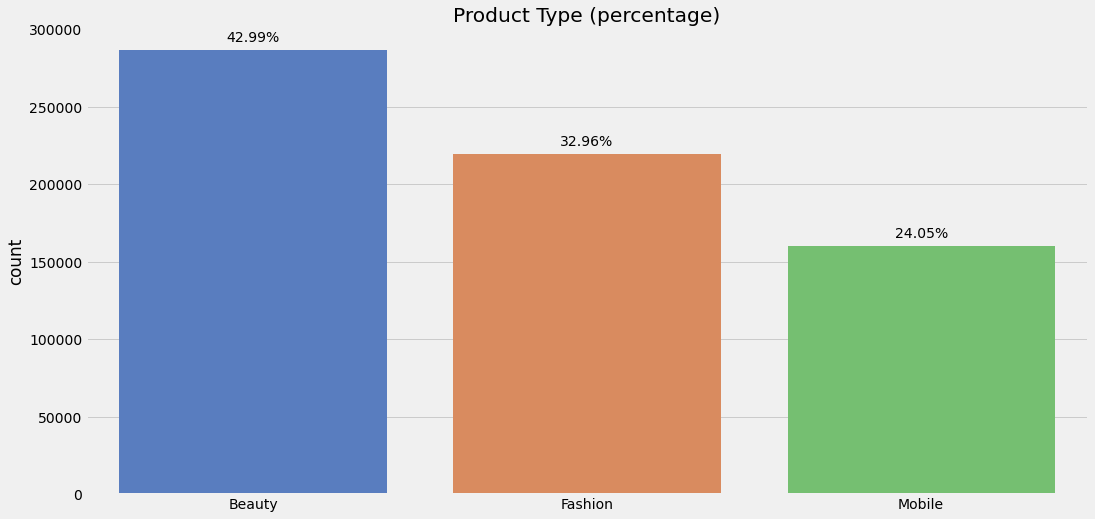

In [39]:
splot = sns.countplot(x=shopee_train_df['Product_type'], palette='muted')

for p in splot.patches:
    splot.annotate(f'{p.get_height() * 100 / shopee_train_df.shape[0]:.2f}%',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center',
                  va='center',
                  fontsize=14,
                  xytext=(0, 12),
                  textcoords='offset points')
    
plt.xlabel(None)
plt.title('Product Type (percentage)')
plt.show()

In [40]:
beauty_only = shopee_train_df[shopee_train_df['Product_type'] == 'Beauty']['Category_type'].value_counts()
fashion_only = shopee_train_df[shopee_train_df['Product_type'] == 'Fashion']['Category_type'].value_counts()
mobile_only = shopee_train_df[shopee_train_df['Product_type'] == 'Mobile']['Category_type'].value_counts()

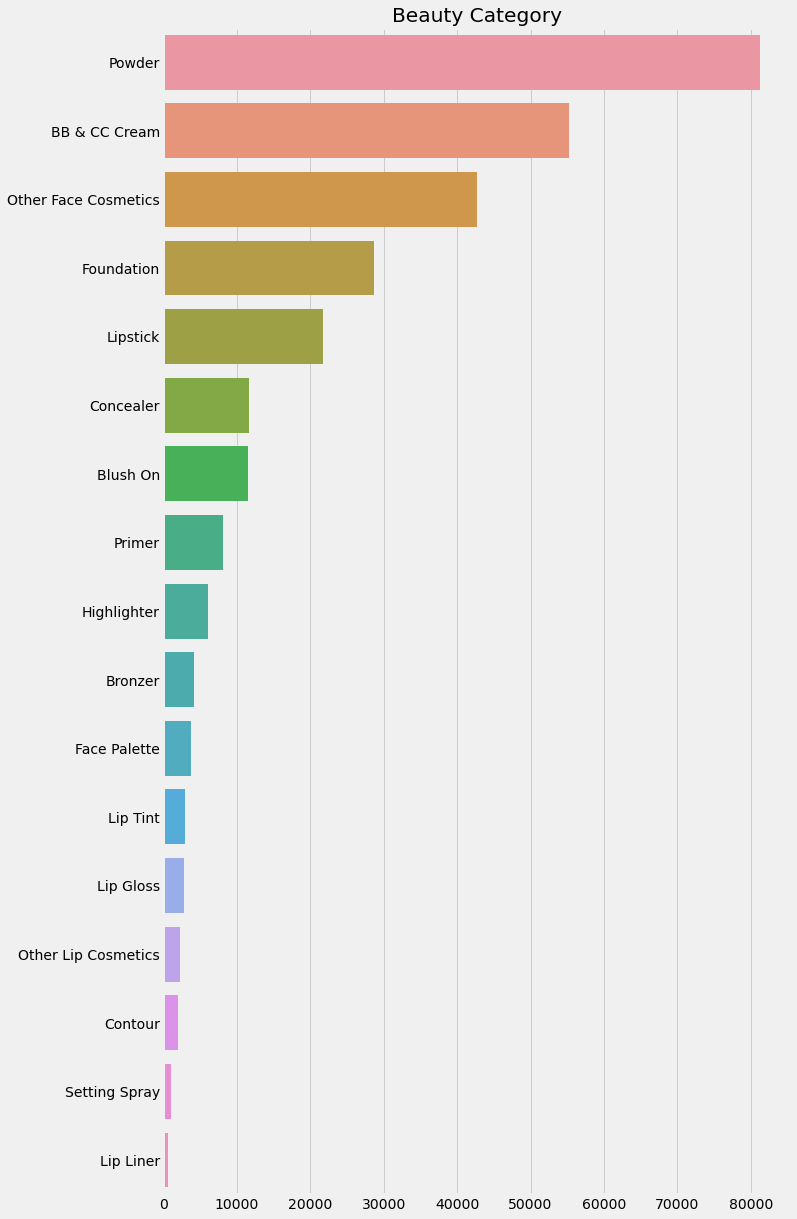

In [41]:
plt.figure(figsize=(10, 20))

sns.barplot(x=beauty_only.values,
            y=beauty_only.index).set_title('Beauty Category');

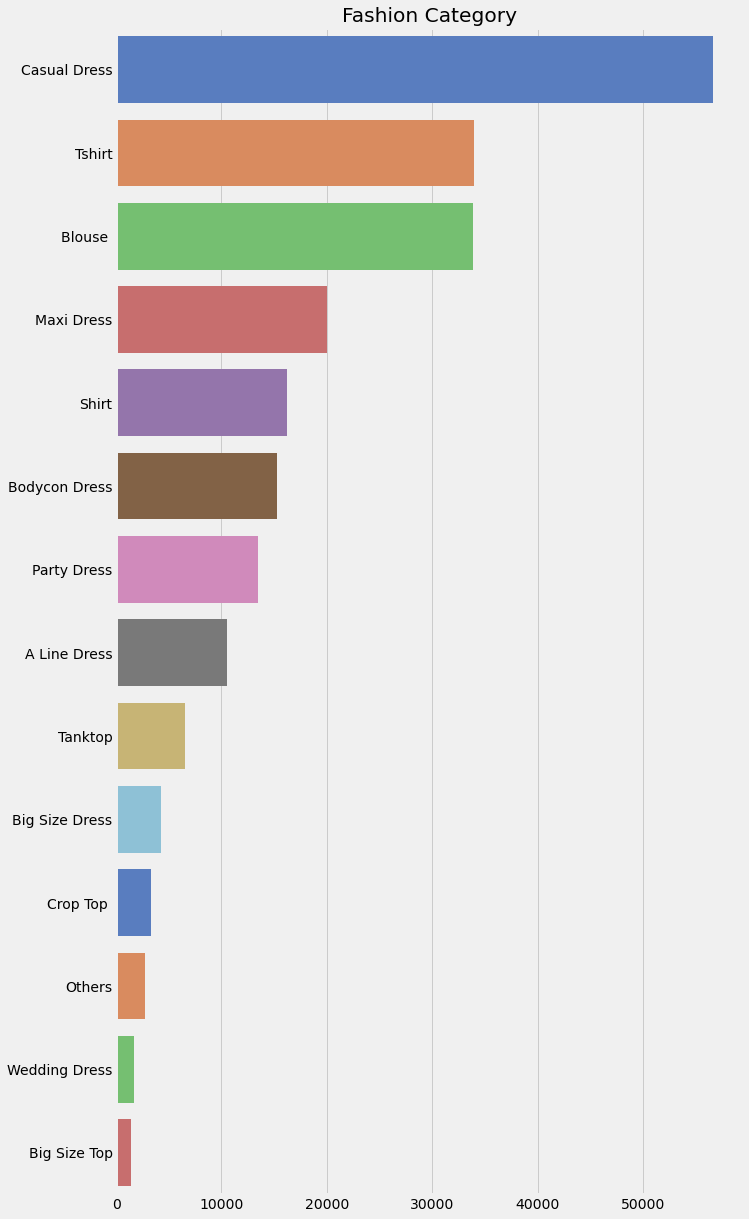

In [42]:
plt.figure(figsize=(10, 20))

sns.barplot(x=fashion_only.values,
            y=fashion_only.index, palette='muted').set_title('Fashion Category');

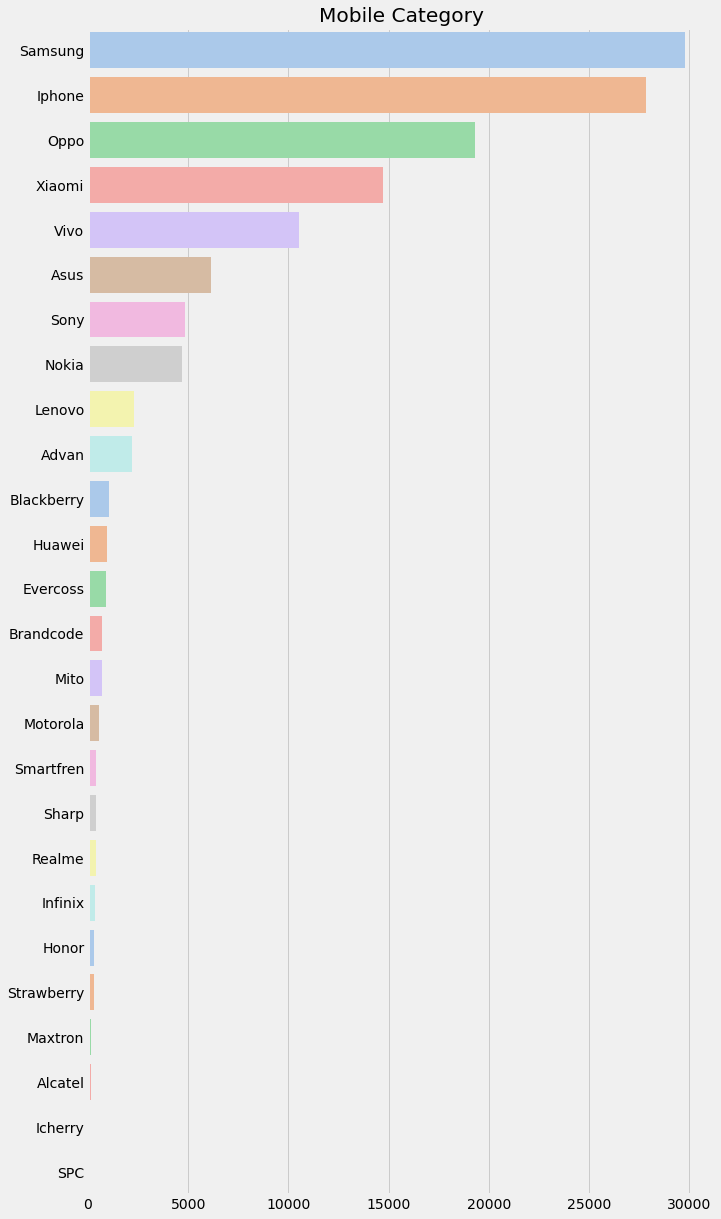

In [43]:
plt.figure(figsize=(10, 20))

mobile_only = mobile_only[1:]  # exclude Others Mobile & Tablet

sns.barplot(x=mobile_only.values,
            y=mobile_only.index, palette='pastel').set_title('Mobile Category');

> ### Problem: Class Imbalance

## EDA

In [44]:
beauty_text = shopee_train_df[shopee_train_df['Product_type'] == 'Beauty']['title']
fashion_text = shopee_train_df[shopee_train_df['Product_type'] == 'Fashion']['title']
mobile_text = shopee_train_df[shopee_train_df['Product_type'] == 'Mobile']['title']

In [45]:
def text_cleaning(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    
    tokenize = text.split()
    words = [text for text in tokenize if len(text) > 1]
    
    return ' '.join(words)

In [46]:
beauty_text = beauty_text.apply(text_cleaning)
fashion_text = fashion_text.apply(text_cleaning)
mobile_text = mobile_text.apply(text_cleaning)

cloud_beauty = ' '.join([text for text in beauty_text])
fashion_cloud = ' '.join([text for text in fashion_text])
mobile_cloud = ' '.join([text for text in mobile_text])

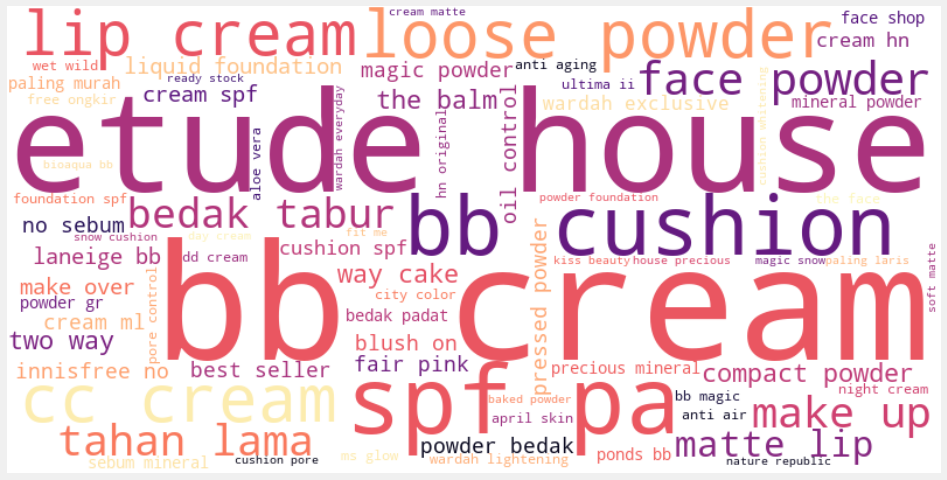

In [47]:
from wordcloud import WordCloud

beauty_ = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=75).generate(cloud_beauty)

plt.imshow(beauty_, interpolation='bilinear')
plt.axis('off')
plt.show()

### We also can use different shapes to make a wordcloud

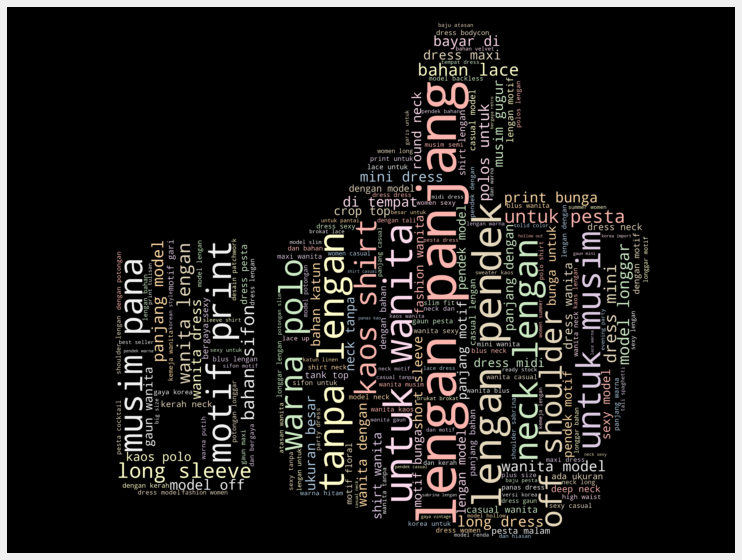

In [48]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# Load image
mask = np.array(Image.open('/kaggle/input/masks/masks-wordclouds/upvote.png'))

# Make the figure
genres_cloud = WordCloud(background_color='black', max_font_size=300, colormap='Pastel1', mask=mask)
genres_cloud.generate(fashion_cloud)

# img_colors = ImageColorGenerator(mask)
# plt.imshow(genres_cloud.recolor(color_func=img_colors),
#            interpolation='bilinear')

plt.imshow(genres_cloud, interpolation='bilinear')

plt.axis('off')
plt.tight_layout()
plt.show()

## Deep Learning for Category Clasification (58 products)

* Understanding Transformer’s Model Architecture
* What is Self-Attention?
* BERT

### Understanding Transformer’s Model Architecture

![transformer](https://miro.medium.com/max/1400/1*BHzGVskWGS_3jEcYYi6miQ.png)

Nowadays, one particular neural network model has proven to be especially effective for common natural language processing tasks. The model is called a **Transformer**. This model relying entirely on **self-attention** to compute representations of its input and output **without using sequence-aligned RNNs or convolution**.”


Let’s take a look at the architecture above, Transformer includes two separate mechanisms — an **encoder** that reads the text input and a **decoder** that produces a prediction for the task.

* **The Encoder** block has 1 layer of a Multi-Head Attention followed by another layer of Feed Forward Neural Network.
* **The decoder**, on the other hand, has an extra Masked Multi-Head Attention.

![encoderdecoder](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/06/Screenshot-from-2019-06-17-20-03-14.png)
source: [analyticsvidhya](https://www.analyticsvidhya.com/blog/2019/06/understanding-transformers-nlp-state-of-the-art-models/#:~:text=The%20Transformer%20in%20NLP%20is,long%2Drange%20dependencies%20with%20ease.&text=The%20idea%20behind%20Transformer%20is,with%20attention%20and%20recurrence%20completely.)

The encoder and decoder blocks are actually multiple identical encoders and decoders stacked on top of each other. Both the encoder stack and the decoder stack have the same number of units.

* The encoder’s inputs first flow through a self-attention layer – a layer that helps the encoder look at other words in the input sentence as it encodes a specific word. We’ll look closer at self-attention later in the post.
* The outputs of the self-attention layer are fed to a feed-forward neural network. The exact same feed-forward network is independently applied to each position.
* The decoder has both those layers, but between them is an attention layer that helps the decoder focus on appropriate parts of the input sentence 

![self-attention](http://jalammar.github.io/images/t/Transformer_decoder.png)

## What is Self-Attention?

> ### ”The animal didn't cross the street because it was too tired”

* What does “it” in this sentence refer to? Is it referring to the street or to the animal?
* It’s a simple question to a human, but not as simple to an algorithm.
* When the model is processing the word “it”, self-attention allows it to associate “it” with “animal”.

![self-attention](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/06/Screenshot-from-2019-06-17-22-31-11.png)

Self-attention allows the model to look at the other words in the input sequence to get a better understanding of a certain word in the sequence. Self-attention also computed not once but multiple times in the Transformer’s architecture, in parallel and independently. It is therefore referred to as **Multi-head Attention**.

## Google’s BERT changing the NLP Landscape

![bert](https://miro.medium.com/max/2340/0*QyPsIZzxdqkfDpsl.jpg)
source: [medium](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270)

One of the most path-breaking developments in the field of NLP was marked by the release of BERT. BERT is an open-sourced NLP pre-training model developed by researchers at Google in 2018. It has also inspired many recent NLP architectures, training approaches and language models, such as Google’s TransformerXL, OpenAI’s GPT-2, ERNIE2.0, XLNet, RoBERTa, etc.

Two Pillars of BERT:

1. BERT uses a **multi-layer bidirectional Transformer encoder**. Since BERT goal is to generate a language model, only the encoder mechanism is necessary.
1. BERT is also pre-trained using **Masked Language Modeling (MLM)** and **Next Sentence Prediction**

### **Masked Language Modeling**

![MLM](https://miro.medium.com/max/1000/1*icb8KIyD7MGKVKf39-TO1A.png)

Before feeding word sequences into BERT, 15% of the words in each sequence are replaced with a [MASK] token. The model then attempts to predict the original value of the masked words, based on the context provided by the other, non-masked, words in the sequence.

### **Next Sentence Prediction (NSP)**

In the BERT training process, the model receives pairs of sentences as input and learns to predict if the second sentence in the pair is the subsequent sentence in the original document. Imagine we have a text dataset of 100,000 sentences, so there will be 50,000 training examples or pairs of sentences as the training data.

![NSP](https://miro.medium.com/max/1400/1*K1em9OWRbZsA8f3IisUCig.png)

* For 50% of the pairs, the second sentence would actually be the next sentence to the first sentence
* For the remaining 50% of the pairs, the second sentence would be a random sentence from the corpus
* The labels for the first case would be ‘IsNext’ and ‘NotNext’ for the second case

![MLM](https://miro.medium.com/max/1400/0*m_kXt3uqZH9e7H4w.png)
source: [medium](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270)

To help the model distinguish between the two sentences in training, the input is processed in the following way before entering the model:

1. A [CLS] token is inserted at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
1. A sentence embedding indicating Sentence A or Sentence B is added to each token. Sentence embeddings are similar in concept to token embeddings with a vocabulary of 2
1. A positional embedding is added to each token to indicate its position in the sequence. The concept and implementation of positional embedding are presented in the Transformer paper.

> When training the BERT model, both the techniques are trained together, thus minimizing the combined loss function of the two strategies.

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from kaggle_datasets import KaggleDatasets

import transformers
from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors

print('Using Tensorflow version:', tf.__version__)

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


Using Tensorflow version: 2.2.0


In [50]:
def regular_encode(texts, tokenizer, maxlen=512):
    enc_di = tokenizer.batch_encode_plus(
        texts, 
        return_attention_masks=False, 
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen)
    
    return np.array(enc_di['input_ids'])

In [51]:
def build_model(transformer, max_len=512):
    
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(58, activation='softmax')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

## Use TPU for train BERT

![TPU](https://storage.googleapis.com/kaggle-media/tpu/tpu_cores_and_chips.png)

* TPUs are hardware accelerators specialized in deep learning tasks.
* The rule of thumb is to use batches of 128 elements per core (ex: batch size of 128*8=1024 for a TPU with 8 cores)
* TPUs pair a classic vector processor with a dedicated matrix multiply unit and excel at any task where large matrix multiplications dominate, such as neural networks.

In [52]:
# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS:  8


In [55]:
AUTO = tf.data.experimental.AUTOTUNE

# Configuration
EPOCHS = 4
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
MAX_LEN = 106
MODEL = 'bert-base-multilingual-uncased'

> We can use BERT Base and BERT Large, as well as languages such as English, Chinese, Bahasa or a multilingual model covering 102 languages trained on wikipedia.

In [56]:
# First load the real tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [57]:
from tensorflow.keras.utils import to_categorical

X = shopee_train_df['title']
y = to_categorical(shopee_train_df['Category'])

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2020)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((599953,), (66662,), (599953, 58), (66662, 58))

In [59]:
%%time 

x_train = regular_encode(X_train.values, tokenizer, maxlen=MAX_LEN)
x_valid = regular_encode(X_val.values, tokenizer, maxlen=MAX_LEN)
x_test = regular_encode(shopee_test_df['title'].values, tokenizer, maxlen=MAX_LEN)

CPU times: user 7min 44s, sys: 1.21 s, total: 7min 45s
Wall time: 7min 45s


In [60]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_valid, y_val))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)

## Load Model into the TPU

In [61]:
%%time
with strategy.scope():
    transformer_layer = TFAutoModel.from_pretrained(MODEL)
    model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 106)]             0         
_________________________________________________________________
tf_bert_model (TFBertModel)  ((None, 106, 768), (None, 167356416 
_________________________________________________________________
tf_op_layer_strided_slice (T [(None, 768)]             0         
_________________________________________________________________
dense (Dense)                (None, 58)                44602     
Total params: 167,401,018
Trainable params: 167,401,018
Non-trainable params: 0
_________________________________________________________________
CPU times: user 45.9 s, sys: 14.3 s, total: 1min
Wall time: 59 s


## Train model

In [63]:
n_steps = x_train.shape[0] // BATCH_SIZE

train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=valid_dataset,
    epochs=EPOCHS,
)

Epoch 1/4
4687/4687 [==============================] - 625s 133ms/step - loss: 1.0955 - accuracy: 0.6698 - val_loss: 0.9436 - val_accuracy: 0.7036
Epoch 2/4
4687/4687 [==============================] - 596s 127ms/step - loss: 0.9121 - accuracy: 0.7110 - val_loss: 0.8744 - val_accuracy: 0.7218
Epoch 3/4
4687/4687 [==============================] - 596s 127ms/step - loss: 0.8470 - accuracy: 0.7287 - val_loss: 0.8398 - val_accuracy: 0.7323
Epoch 4/4
4687/4687 [==============================] - 595s 127ms/step - loss: 0.7997 - accuracy: 0.7412 - val_loss: 0.8217 - val_accuracy: 0.7375


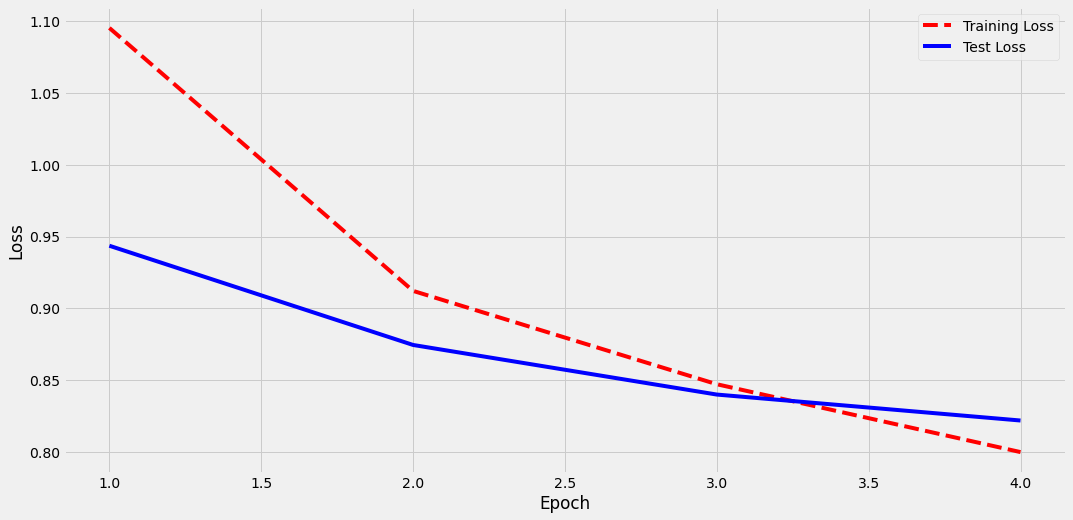

In [65]:
# Get training and test loss histories
training_loss = train_history.history['loss']
test_loss = train_history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Make a prediction & submission

In [66]:
pred = model.predict(test_dataset)
pred = np.argmax(pred, axis=1)

In [70]:
submission = pd.DataFrame({'itemid': shopee_test_df['itemid'],
                           'Category': pred})

submission.to_csv('submission1', index=False)

# Result:

I got:
* 0.75145 in Public Score
* 0.75248 in Private Score

Actually i got 0.75701 used BERT-Base-en_uncased, trained with GPU, but is was really slow compared with TPU

> ## Of course this model did not a high rank in competition, there is a team that gets a 0.81202

## Next:

Let’s look at some of the other developments which came after BERT’s introduction:

----------------------------------------------------

### RoBERTa

Developed by Facebook, RoBERTa is built on BERT’s language masking strategy and modifies some of the key hyperparameters in BERT. To improve the training procedure, RoBERTa removes the Next Sentence Prediction (NSP) task from BERT’s pre-training and introduces dynamic masking so that the masked token changes during the training epochs. It was also trained on an order of magnitude more data than BERT, for a longer amount of time.

----------------------------------------------------

### DistilBERT

Developed by HuggingFace, DistilBERT learns a distilled (approximate) version of BERT, retaining 95% performance on GLUE but using only half the number of parameters (only 66 million parameters, instead of 110 million). The concept is that once a large neural network has been trained, its full output distributions can be approximated using a smaller network (like posterior approximation).

----------------------------------------------------

### XLM/mBERT

Developed by Facebook, XLM uses a known pre-processing technique (BPE) and a dual-language training mechanism with BERT in order to learn relations between words in different languages. The model outperforms other models in a multi-lingual classification task and significantly improves machine translation when a pre-trained model is used for the initialization of the translation model.

----------------------------------------------------

### ALBERT

Jointly developed by Google Research and Toyota Technological Institute, ALBERT (A Lite BERT for Self-Supervised Learning of Language Representations) is primed to be the successor to BERT which is much smaller and lighter and smarter to BERT. Two key architecture changes allow ALBERT to both outperform and dramatically reduce the model size. The first one is the number of parameters. It improves parameter efficiency by sharing all parameters, across all layers. That means Feed Forward Network parameters and Attention parameters are all shared.

Researchers also isolated the size of the hidden layers from the size of vocabulary embeddings. This was done by projecting one-hot vectors into a lower-dimensional embedding space and then to the hidden space, which made it easier to increase the hidden layer size without significantly increasing the parameter size of the vocabulary embeddings.

When it comes to pre-train, ALBERT has it’s own training method called Sentence-Order Prediction (SOP) as opposed to NSP. The problem with NSP as theorized by the authors was that it conflates topic prediction with coherence prediction.
ALBERT represents a new state of the art for NLP on several benchmarks and a new state of the art for parameter efficiency. It’s an amazing breakthrough that builds on the great work done by BERT one year ago and advances NLP in multiple aspects.

# Reference

* [Spell Check Indonesia menggunakan Pre-trained Word Vectors Fasttext Model](https://medium.com/@yasirabd/spell-check-indonesia-menggunakan-pre-trained-fasttext-model-14e90a3f1ac0)
* [BERT Explained: State of the art language model for NLP](https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270)
* [How do Transformers Work in NLP?](https://www.analyticsvidhya.com/blog/2019/06/understanding-transformers-nlp-state-of-the-art-models/#:~:text=The%20Transformer%20in%20NLP%20is,long%2Drange%20dependencies%20with%20ease.&text=The%20idea%20behind%20Transformer%20is,with%20attention%20and%20recurrence%20completely.)
* [Understanding BERT: Is it a Game Changer in NLP?](https://towardsdatascience.com/understanding-bert-is-it-a-game-changer-in-nlp-7cca943cf3ad)